In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from IPython.display import clear_output

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output


import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
import h5py

import sympy as sym

    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

from scipy.sparse import csr_matrix
def nufd(x):
    n = len(x)
    h = x[1:]-x[:n-1]
    a0 = -(2*h[0]+h[1])/(h[0]*(h[0]+h[1]))
    ak = -h[1:]/(h[:n-2]*(h[:n-2]+h[1:]))
    an = h[-1]/(h[-2]*(h[-1]+h[-2]))
    b0 = (h[0]+h[1])/(h[0]*h[1]) 
    bk = (h[1:] - h[:n-2])/(h[:n-2]*h[1:])
    bn = -(h[-1]+h[-2])/(h[-1]*h[-2])
    c0 = -h[0]/(h[1]*(h[0]+h[1]))
    ck = h[:n-2]/(h[1:]*(h[:n-2]+h[1:]))
    cn = (2*h[-1]+h[-2])/(h[-1]*(h[-2]+h[-1]))
    val  = np.hstack((a0,ak,an,b0,bk,bn,c0,ck,cn))
    row = np.tile(np.arange(n),3)
    dex = np.hstack((0,np.arange(n-2),n-3))
    col = np.hstack((dex,dex+1,dex+2))
    D = csr_matrix((val,(row,col)),shape=(n,n))
    return D

In [41]:
import pandas as pd
from pandas import Series

volumes = pd.read_excel("Volume-data/Volumes of snow.xlsx",sheet_name="Sheet1",
                          header=0,date_parser=[1]) #,names=["#","timestamp","probe1","probe2"])
volumes = volumes[1:]

In [42]:
volumes.head()

,Date,CHIP,POND
1,2018-04-21,249.0667,251.1667
2,2018-05-12,216.5000,226.1333
3,2018-05-28,195.5000,208.1000
4,2018-06-10,177.0000,187.7000
5,2018-06-20,157.2333,170.1333


In [43]:
volumes.set_index('Date')

,CHIP,POND
Date,,
2018-04-21,249.0667,251.1667
2018-05-12,216.5000,226.1333
2018-05-28,195.5000,208.1000
2018-06-10,177.0000,187.7000
2018-06-20,157.2333,170.1333
2018-06-30,139.1000,150.9000
2018-07-03,83.0333,142.4667
2018-07-10,70.0667,130.3333
2018-07-21,61.6667,116.1000


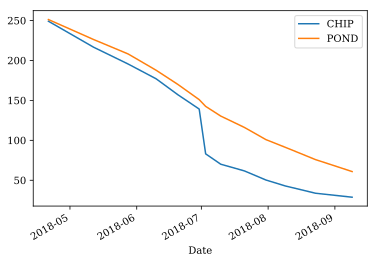

In [44]:
ax = volumes.plot(x='Date',y='CHIP')
volumes.plot(ax = ax, x='Date',y='POND')

In [45]:
volumes['normChipJul'] = volumes['CHIP']/83.0333*142.4667

(25, 150)

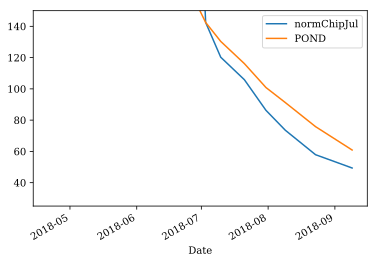

In [46]:
ax = volumes.plot(x='Date',y='normChipJul')
volumes.plot(ax = ax, x='Date',y='POND')
plt.ylim(25,150)

In [47]:
volumes['time'] = pd.to_timedelta(volumes['Date']).dt.total_seconds()

In [48]:
volumes['time']

1     1.524269e+09
2     1.526083e+09
3     1.527466e+09
4     1.528589e+09
5     1.529453e+09
6     1.530317e+09
7     1.530576e+09
8     1.531181e+09
9     1.532131e+09
10    1.532995e+09
11    1.533773e+09
12    1.534982e+09
13    1.536451e+09
Name: time, dtype: float64

In [49]:
Dt = nufd(np.array(volumes['time']))

In [52]:
volumes['dCHIP'] = np.abs(Dt*(np.array(volumes['CHIP'])))
volumes['dPOND'] = np.abs(Dt*(np.array(volumes['POND'])))


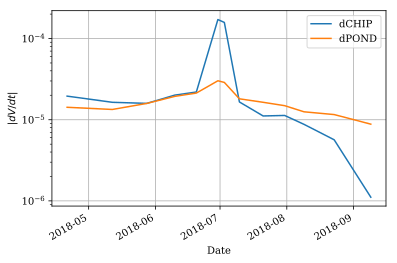

In [59]:
ax = volumes.plot(x='Date', y='dCHIP')
volumes.plot(ax = ax, x = 'Date', y = 'dPOND', logy=True)
plt.grid(True)
plt.ylabel(r"$\left\vert dV/dt\right\vert$")
plt.show()

In [60]:
weather = pd.read_excel("wunderground-data/KVTCRAFT2_2018-05-21_2018-09-09.xlsx",
                          header=0)

In [61]:
weather.head()

,date,time,temperature,dewpoint,humidity,wind_speed,wind_gust_speed,wind_dir_degrees,wind_dir,pressure,...,precip_rate,precip_1hr,precip_today,solarradiation,uv_index,temperature_indoor,humidity_indoor,software_type,event,conditions
0,2018-05-21,00:01:00,9.3,6.1,82,0.0,4.8,NaN,North,1016.8,...,0.0,0.0,0.0,0,NaN,NaN,weatherlink.com 1.10,NaN,NaN,NaN
1,2018-05-21,00:31:00,8.2,6.1,86,0.0,3.2,NaN,North,1017.2,...,0.0,0.0,0.0,0,NaN,NaN,weatherlink.com 1.10,NaN,NaN,NaN
2,2018-05-21,01:01:00,7.4,5.6,89,0.0,0.0,NaN,North,1017.2,...,0.0,0.0,0.0,0,NaN,NaN,weatherlink.com 1.10,NaN,NaN,NaN
3,2018-05-21,01:32:00,6.3,5.0,90,0.0,0.0,NaN,North,1017.2,...,0.0,0.0,0.0,0,NaN,NaN,weatherlink.com 1.10,NaN,NaN,NaN
4,2018-05-21,02:02:00,5.7,4.4,91,0.0,0.0,NaN,North,1017.2,...,0.0,0.0,0.0,0,NaN,NaN,weatherlink.com 1.10,NaN,NaN,NaN


(0, 200)

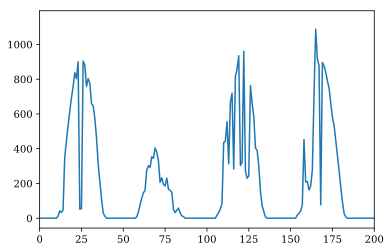

In [66]:
plt.plot(np.array(weather['solarradiation']))
plt.xlim(0,200)